# Medidas de concentração e desigualdade

A concentração dos dados está relacionada à variabilidade ou dispersão dos valores observados de uma determinada variável. Sejam $x_{1}, ..., x_{n}$ os valores de uma variável na amostra. Estamos interessados em saber se $T = x_{1} + ... + x_{n}$ tem maior contribuição de poucas observações ou se todas as observações contribuem de forma similar na soma $T$.

## Curva de Lorenz

A construção da curva de Lorenz envolve dois eixos: o eixo horizontal representa a proporção acumulada de posições, enquanto o eixo vertical representa a proporção acumulada dos valores ordenados de uma variável. A curva é sempre representada abaixo da linha de igualdade, que é uma linha diagonal que vai do canto inferior esquerdo ao canto superior direito do gráfico, representando uma distribuição igualitária de posição e valor. A curva de Lorenz é defina como:

**Valores ordenados:** $x_{(1)} \leq x_{(2)} \leq ... \leq x_{(n)}$, **Valor total** $T = x_{(1)} + x_{(2)} + ... + x_{(n)}$

**Proporção acumulada de posições** até a i-ésima posição: $$p_{i} = \frac{i}{n}$$ 

$$ p_{0} = 0, p_{1} = \frac{1}{n}, p_{2} = \frac{2}{n}, p_{n-1} = \frac{n-1}{n}, p_{n} = 1$$

**Proporção acumulada de valores** até a i-ésima posição: $$q_{i} = \frac{x_{(1)} + x_{(2)} + ... + x_{(i)}}{T}$$

$$ q_{0} = 0, q_{1} = \frac{x_{(1)}}{T}, q_{2} = \frac{x_{(1)} + x_{(2)}}{T}, q_{n-1} = \frac{x_{(1)} + x_{(2)} + ... + x_{(n-1)}}{T}, q_{n} = 1$$

O gráfico formado pela união dos pontos $(0, 0),(p_{1}, q_{1}),(p_{2}, q_{2}), ..., (p_{n-1}, q_{n-1}), (1, 1)$ é chamado de curva de Lorenz. O segmento de reta unindo $(0, 0)$ e $(1, 1)$, representando a linha de igualdade, também é incluído.

## Índice de Gini

O índice de Gini é uma medida quantitativa que fornece uma maneira de avaliar a desigualdade na distribuição de uma variável em uma população, sendo amplamente utilizado para análise socioeconômica e comparações entre diferentes países ou regiões. Ele mede a área compreendida entre a linha de igualdade e a curva de Lorenz, chamada de área de desigualdade $D$. O índice de gini $G$ é definido como:

$$G =  1 - \frac{\sum \limits _{i=1} ^{n} (q_{i} + q_{i-1})}{n} = 1 - \frac{2 \sum \limits _{i=1} ^{n} q_{i} - q_{n}}{n}$$ $$q_{0} = 0 ~ \text{e} ~ q_{n} = 1$$


In [103]:
import numpy as np
import matplotlib.pyplot as plt

def lorenz_curve(data):
    n = data.shape[0]
    T = np.sum(data)
    p = np.arange(n+1) / n
    q = np.cumsum(np.sort(data)) / T
    q = np.concatenate(([0], q))
    G = 1 - ((2 * np.sum(q) - 1) / n)
    print(f"Índice de Gini = {G}")
    
    plt.plot(p, q, label='Curva de Lorenz')
    plt.plot([0, 1], [0, 1], linestyle='dashed', color='gray', label='Linha de Igualdade')
    plt.fill_between(p, p, alpha=0.5, color='r', label='Área de Desigualdade')
    plt.fill_between(p, q, alpha=0.5)
    plt.xlabel('p')
    plt.ylabel('L(p)')
    plt.title('Lorenz Curve')
    plt.legend()
    plt.grid(True)
    
    plt.show()

Índice de Gini = 0.45999999999999996


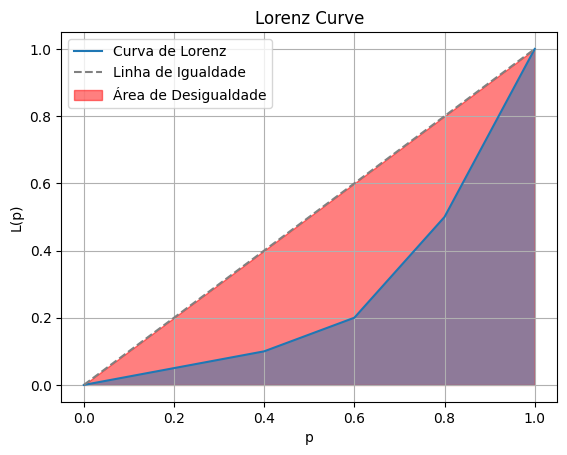

In [104]:
data = np.array([1, 1, 2, 6, 10])
lorenz_curve(data)

Índice de Gini = 0.7780645161290323


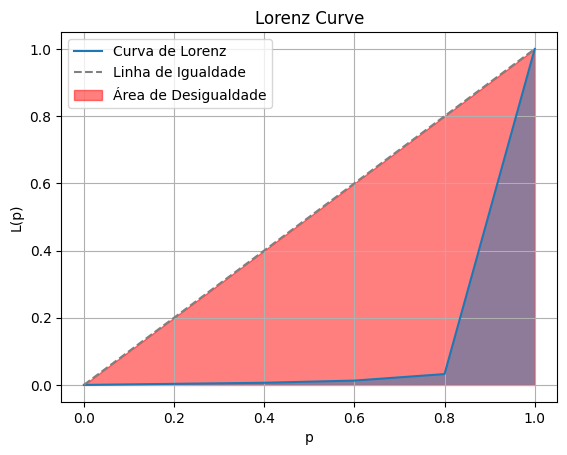

In [99]:
data = np.array([1, 1, 2, 6, 300])
lorenz_curve(data)

Índice de Gini = 0.1499999999999999


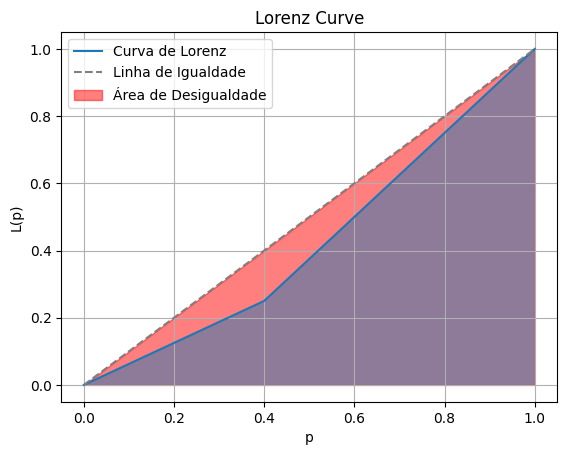

In [100]:
data = np.array([1, 1, 2, 2, 2])
lorenz_curve(data)